In [1]:
import pandas as pd
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv(r"Cfile.csv")
df

,Company Name,Ticker Symbol,Country of Exchange,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap
0,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2016,2.93,5.1,20.1,66.40,70.25,68.00,56.88,66.40,1.387610e+10
1,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2017,4.17,7.7,20.4,68.66,68.28,74.58,59.31,68.66,2.089835e+10
2,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2018,12.25,18.6,42.2,73.62,72.78,74.72,73.21,73.62,9.062689e+09
3,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2019,10.74,16.3,34.2,74.58,69.59,71.77,88.15,74.58,8.503184e+09
4,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2020,3.26,4.9,10.5,76.25,74.38,69.86,90.37,76.25,1.191101e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6291,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2019,24.28,0.9,13.1,89.93,90.84,91.69,86.64,79.96,6.138598e+10
6292,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2020,27.69,1.0,12.7,88.87,89.60,90.93,85.50,50.53,6.349212e+10
6293,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2021,25.56,0.9,10.5,89.19,86.31,87.95,97.03,76.17,6.604281e+10
6294,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2022,34.66,1.2,13.7,87.89,85.62,87.16,94.72,78.62,7.199106e+10


In [5]:
import pandas as pd

# Assuming your DataFrame is named df
min_eps = df['EPS'].min()
max_eps = df['EPS'].max()

min_roa = df['ROA'].min()
max_roa = df['ROA'].max()

min_roe = df['ROE'].min()
max_roe = df['ROE'].max()

print(f"EPS range: {min_eps} to {max_eps}")
print(f"ROA range: {min_roa} to {max_roa}")
print(f"ROE range: {min_roe} to {max_roe}")


EPS range: -731.89 to 780.29
ROA range: -15.1 to 53.4
ROE range: -221.8 to 529.3


# Add Market Capitalization Category

In [7]:
# Assuming your DataFrame is named df and the 'MarketCap' column is already present
bins = [0, 3e8, 2e9, 1e10, 2e11, float('inf')]
labels = ['Micro Cap', 'Small Cap', 'Mid Cap', 'Large Cap', 'Mega Cap']

df['Market Capitalization Category'] = pd.cut(df['MarketCap'], bins=bins, labels=labels, right=False)
df

,Company Name,Ticker Symbol,Country of Exchange,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap,Market Capitalization Category
0,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2016,2.93,5.1,20.1,66.40,70.25,68.00,56.88,66.40,1.387610e+10,Large Cap
1,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2017,4.17,7.7,20.4,68.66,68.28,74.58,59.31,68.66,2.089835e+10,Large Cap
2,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2018,12.25,18.6,42.2,73.62,72.78,74.72,73.21,73.62,9.062689e+09,Mid Cap
3,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2019,10.74,16.3,34.2,74.58,69.59,71.77,88.15,74.58,8.503184e+09,Mid Cap
4,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2020,3.26,4.9,10.5,76.25,74.38,69.86,90.37,76.25,1.191101e+10,Large Cap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6291,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2019,24.28,0.9,13.1,89.93,90.84,91.69,86.64,79.96,6.138598e+10,Large Cap
6292,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2020,27.69,1.0,12.7,88.87,89.60,90.93,85.50,50.53,6.349212e+10,Large Cap
6293,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2021,25.56,0.9,10.5,89.19,86.31,87.95,97.03,76.17,6.604281e+10,Large Cap
6294,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2022,34.66,1.2,13.7,87.89,85.62,87.16,94.72,78.62,7.199106e+10,Large Cap


# GAM

In [9]:
import pandas as pd
import numpy as np
from pygam import LinearGAM, s, f, te
import matplotlib.pyplot as plt

# Define predictors and ESG targets
predictors = ['EPS', 'ROA', 'ROE']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Prepare DataFrame: categorical codes
df = df.copy()
df['Country of Exchange'] = df['Country of Exchange'].astype('category')
df['NAICS National Industry Name'] = df['NAICS National Industry Name'].astype('category')
df['Market Capitalization Category'] = df['Market Capitalization Category'].astype('category')

df['Country_code'] = df['Country of Exchange'].cat.codes
df['Industry_code'] = df['NAICS National Industry Name'].cat.codes
df['MCap_code'] = df['Market Capitalization Category'].cat.codes

# Fixed penalty for all terms
fixed_lambda = 0.001

# Loop over ESG targets
for target in esg_targets:
    df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

    # Create feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])
    y = df_clean[target].values

    # Build GAM model with all interactions and fixed penalties
    gam = LinearGAM(
        s(0, lam=fixed_lambda) + s(1, lam=fixed_lambda) + s(2, lam=fixed_lambda) +  # EPS, ROA, ROE
        f(3, lam=fixed_lambda) + f(4, lam=fixed_lambda) + f(5, lam=fixed_lambda) +  # Country, Industry, MCap

        # Categorical × Categorical
        te(3, 4, lam=fixed_lambda) +
        te(3, 5, lam=fixed_lambda) +
        te(4, 5, lam=fixed_lambda) +

        # Numeric × Numeric
        te(0, 1, lam=fixed_lambda) +
        te(0, 2, lam=fixed_lambda) +
        te(1, 2, lam=fixed_lambda) +

        # Numeric × Categorical
        te(0, 3, lam=fixed_lambda) +
        te(0, 4, lam=fixed_lambda) +
        te(0, 5, lam=fixed_lambda) +
        te(1, 3, lam=fixed_lambda) +
        te(1, 4, lam=fixed_lambda) +
        te(1, 5, lam=fixed_lambda) +
        te(2, 3, lam=fixed_lambda) +
        te(2, 4, lam=fixed_lambda) +
        te(2, 5, lam=fixed_lambda)
    ).fit(X, y)

    # Print summary
    print(f"\nGAM Summary for Target: {target}")
    gam.summary()

    # # Plot smooth effects of numeric variables
    # for i, predictor in enumerate(predictors):
    #     plt.figure()
    #     XX = gam.generate_X_grid(term=i)
    #     plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    #     plt.title(f'{target} ~ {predictor}')
    #     plt.xlabel(predictor)
    #     plt.ylabel(f'Partial effect on {target}')
    #     plt.grid(True)
    #     plt.tight_layout()
    #     plt.show()


GAM Summary for Target: ESG_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -37222.3992
Number of Samples:                         6296 AIC:                                             75449.936
                                                AICc:                                           75537.3183
                                                GCV:                                              171.3132
                                                Scale:                                            146.9365
                                                Pseudo R-Squared:                                   0.5985
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_32588\1282122511.py:62: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



GAM Summary for Target: Env_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -39634.4092
Number of Samples:                         6296 AIC:                                             80273.956
                                                AICc:                                           80361.3383
                                                GCV:                                              251.5381
                                                Scale:                                            215.7459
                                                Pseudo R-Squared:                                   0.6532
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_32588\1282122511.py:62: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



GAM Summary for Target: Soc_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -39521.9504
Number of Samples:                         6296 AIC:                                            80049.0384
                                                AICc:                                           80136.4207
                                                GCV:                                              247.0755
                                                Scale:                                            211.9184
                                                Pseudo R-Squared:                                   0.5687
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_32588\1282122511.py:62: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



GAM Summary for Target: Gov_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -40788.1318
Number of Samples:                         6296 AIC:                                            82581.4013
                                                AICc:                                           82668.7836
                                                GCV:                                              302.2333
                                                Scale:                                            259.2275
                                                Pseudo R-Squared:                                   0.4843
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_32588\1282122511.py:62: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



GAM Summary for Target: ESG_Comb_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -38066.5217
Number of Samples:                         6296 AIC:                                            77138.1811
                                                AICc:                                           77225.5634
                                                GCV:                                              195.9698
                                                Scale:                                            168.0846
                                                Pseudo R-Squared:                                   0.48

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_32588\1282122511.py:62: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [11]:
import os
import pickle
import numpy as np
# from pygam import LinearGAM, s, f, te  # Ensure this is not overwritten!

# Directory to save models
model_dir = 'saved_gam_models'
os.makedirs(model_dir, exist_ok=True)

# Loop over ESG targets
for target in esg_targets:
    df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

    # Create feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])
    y = df_clean[target].values

    # Build GAM model
    gam = LinearGAM(
        s(0, lam=fixed_lambda) + s(1, lam=fixed_lambda) + s(2, lam=fixed_lambda) +  # Numeric terms
        f(3, lam=fixed_lambda) + f(4, lam=fixed_lambda) + f(5, lam=fixed_lambda) +  # Factor terms
        te(3, 4, lam=fixed_lambda) + te(3, 5, lam=fixed_lambda) + te(4, 5, lam=fixed_lambda) +  # Cat × Cat
        te(0, 1, lam=fixed_lambda) + te(0, 2, lam=fixed_lambda) + te(1, 2, lam=fixed_lambda) +  # Num × Num
        te(0, 3, lam=fixed_lambda) + te(0, 4, lam=fixed_lambda) + te(0, 5, lam=fixed_lambda) +  # Num × Cat
        te(1, 3, lam=fixed_lambda) + te(1, 4, lam=fixed_lambda) + te(1, 5, lam=fixed_lambda) +
        te(2, 3, lam=fixed_lambda) + te(2, 4, lam=fixed_lambda) + te(2, 5, lam=fixed_lambda)
    ).fit(X, y)

    # Save model
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'wb') as file_handle:  # renamed from `f` to `file_handle`
        pickle.dump(gam, file_handle)

    print(f"✅ Saved model for {target} to {model_path}")

✅ Saved model for ESG_score to saved_gam_models\gam_model_ESG_score.pkl
✅ Saved model for Env_score to saved_gam_models\gam_model_Env_score.pkl
✅ Saved model for Soc_score to saved_gam_models\gam_model_Soc_score.pkl
✅ Saved model for Gov_score to saved_gam_models\gam_model_Gov_score.pkl
✅ Saved model for ESG_Comb_score to saved_gam_models\gam_model_ESG_Comb_score.pkl


# Pareto

### Only with pilaar scores and more constraints

In [22]:
df

,Company Name,Ticker Symbol,Country of Exchange,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap,Market Capitalization Category,Country_code,Industry_code,MCap_code
0,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2016,2.93,5.1,20.1,66.40,70.25,68.00,56.88,66.40,1.387610e+10,Large Cap,5,146,3
1,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2017,4.17,7.7,20.4,68.66,68.28,74.58,59.31,68.66,2.089835e+10,Large Cap,5,146,3
2,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2018,12.25,18.6,42.2,73.62,72.78,74.72,73.21,73.62,9.062689e+09,Mid Cap,5,146,2
3,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2019,10.74,16.3,34.2,74.58,69.59,71.77,88.15,74.58,8.503184e+09,Mid Cap,5,146,2
4,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2020,3.26,4.9,10.5,76.25,74.38,69.86,90.37,76.25,1.191101e+10,Large Cap,5,146,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6291,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2019,24.28,0.9,13.1,89.93,90.84,91.69,86.64,79.96,6.138598e+10,Large Cap,14,50,3
6292,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2020,27.69,1.0,12.7,88.87,89.60,90.93,85.50,50.53,6.349212e+10,Large Cap,14,50,3
6293,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2021,25.56,0.9,10.5,89.19,86.31,87.95,97.03,76.17,6.604281e+10,Large Cap,14,50,3
6294,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2022,34.66,1.2,13.7,87.89,85.62,87.16,94.72,78.62,7.199106e+10,Large Cap,14,50,3


In [44]:
max_country = df['Country_code'].max()
max_industry = df['Industry_code'].max()
max_mcap = df['MCap_code'].max()
print("Max country code:", max_country)
print("Max industry code:", max_industry)
print("Max market cap code:", max_mcap)
max_env = df['Env_score'].max()
max_soc = df['Soc_score'].max()
max_gov = df['Gov_score'].max()
print("Max env:", max_env)
print("Max soc:", max_soc)
print("Max gov:", max_gov)


Max country code: 16
Max industry code: 193
Max market cap code: 4
Max env: 99.0
Max soc: 98.47
Max gov: 99.33


In [78]:
gam

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + f(3) + f(4) + f(5) + te(3, 4) + te(3, 5) + te(4, 5) + te(0, 1) + te(0, 2) + te(1, 2) + te(0, 3) + te(0, 4) + te(0, 5) + te(1, 3) + te(1, 4) + te(1, 5) + te(2, 3) + te(2, 4) + te(2, 5) + intercept,
   tol=0.0001, verbose=False)

In [74]:
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
import numpy as np
import pandas as pd
import joblib

# Compute max codes from df
max_country = df['Country_code'].max()
max_industry = df['Industry_code'].max()
max_mcap = df['MCap_code'].max()

# Compute realistic upper bounds (99th percentile)
realistic_eps_max = df["EPS"].quantile(0.99)
realistic_roa_max = df["ROA"].quantile(0.99)
realistic_roe_max = df["ROE"].quantile(0.99)

print("EPS 99% max:", realistic_eps_max)
print("ROA 99% max:", realistic_roa_max)
print("ROE 99% max:", realistic_roe_max)

# Load GAM models
gam_environment = joblib.load("saved_gam_models/gam_model_Env_score.pkl")
gam_social = joblib.load("saved_gam_models/gam_model_Soc_score.pkl")
gam_governance = joblib.load("saved_gam_models/gam_model_Gov_score.pkl")

class ESGMultiObjectiveProblem(Problem):
    def __init__(self):
        super().__init__(
            n_var=6,
            n_obj=6,
            n_constr=13,
            xl=np.array([-731.89, -15.1, -221.8, 0, 0, 0]),
            xu=np.array([
                realistic_eps_max,
                realistic_roa_max,
                realistic_roe_max,
                max_country,
                max_industry,
                max_mcap
            ])
        )

    def _evaluate(self, X, out, *args, **kwargs):
        # Extract variables
        eps = X[:, 0]
        roa = X[:, 1]
        roe = X[:, 2]
        country_code = np.round(X[:, 3])  # Round to integers
        industry_code = np.round(X[:, 4])
        mcap_code = np.round(X[:, 5])

        # Combine features
        X_full = np.column_stack((eps, roa, roe, country_code, industry_code, mcap_code))

        # Predict ESG scores and clip to [0,100]
        esg_env = np.clip(gam_environment.predict(X_full), 0, 100)
        esg_soc = np.clip(gam_social.predict(X_full), 0, 100)
        esg_gov = np.clip(gam_governance.predict(X_full), 0, 100)

        avg_esg = (esg_env + esg_soc + esg_gov) / 3

        # Objectives (to be minimized → we negate to maximize)
        out["F"] = np.column_stack([
            -esg_env,
            -esg_soc,
            -esg_gov,
            -roa,
            -eps,
            -roe
        ])

        # Constraints (all must be ≤ 0)
        out["G"] = np.column_stack([
            esg_env - 100,
            0 - esg_env,
            esg_soc - 100,
            0 - esg_soc,
            esg_gov - 100,
            0 - esg_gov,
            60 - avg_esg,                     # avg ESG ≥ 60
            0 - roe,
            0 - roa,
            0 - eps,
            eps - realistic_eps_max,         # EPS ≤ 99th percentile
            roa - realistic_roa_max,
            roe - realistic_roe_max
        ])

        # Print debug info
        print(f"ESG Env min={esg_env.min():.2f}, max={esg_env.max():.2f}")
        print(f"ESG Soc min={esg_soc.min():.2f}, max={esg_soc.max():.2f}")
        print(f"ESG Gov min={esg_gov.min():.2f}, max={esg_gov.max():.2f}")

# Optimization setup
problem = ESGMultiObjectiveProblem()

algorithm = NSGA2(
    pop_size=100,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=40),
    eliminate_duplicates=True
)

res = minimize(
    problem,
    algorithm=algorithm,
    termination=('n_gen', 200),
    seed=1,
    verbose=True
)

# Output results
if res.F is None or len(res.F) == 0:
    print("⚠️ Optimization failed: No feasible solutions found.")
else:
    pareto_solutions = res.X
    pareto_objectives = -res.F  # Flip signs to get original values

    for i in range(min(10, len(pareto_solutions))):
        print(f"\nSolution {i+1}:")
        print(f"EPS: {pareto_solutions[i, 0]:.2f}, ROA: {pareto_solutions[i, 1]:.2f}, ROE: {pareto_solutions[i, 2]:.2f}")
        print(f"Environmental Score: {pareto_objectives[i, 0]:.2f}")
        print(f"Social Score:       {pareto_objectives[i, 1]:.2f}")
        print(f"Governance Score:   {pareto_objectives[i, 2]:.2f}")
        print(f"ROA:                {pareto_objectives[i, 3]:.2f}")
        print(f"EPS:                {pareto_objectives[i, 4]:.2f}")
        print(f"ROE:                {pareto_objectives[i, 5]:.2f}")



EPS 99% max: 38.56250000000012
ROA 99% max: 27.5
ROE 99% max: 80.01000000000003
ESG Env min=0.00, max=100.00
ESG Soc min=0.00, max=100.00
ESG Gov min=0.00, max=100.00
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |      1 |  3.1951382330 |  4.964111E+02 |             - |             -
ESG Env min=0.00, max=100.00
ESG Soc min=0.00, max=100.00
ESG Gov min=0.00, max=100.00
     2 |      200 |      1 |  3.1951382330 |  2.237709E+02 |             - |             -
ESG Env min=0.00, max=100.00
ESG Soc min=0.00, max=100.00
ESG Gov min=0.00, max=100.00
     3 |      300 |      1 |  1.0639177545 |  1.109643E+02 |             - |             -
ESG Env min=0.00, max=100.00
ESG Soc min=0.00, max=100.00
ESG Gov min=0.00, max=100.00
     4 |      400 |      2 |  0.000000E+00 |  4.681536E+01 |             - |             -
ESG Env min=0.00, max=100.00
ESG Soc min=0.00, max=100.00
ESG Gov min=0.00, max=100.00
     5 |      500 |      5 |  

In [56]:
# Mapping codes back to names for interpretability
country_map = df.drop_duplicates("Country_code").set_index("Country_code")["Country of Exchange"].to_dict()
industry_map = df.drop_duplicates("Industry_code").set_index("Industry_code")["NAICS National Industry Name"].to_dict()
mcap_map = df.drop_duplicates("MCap_code").set_index("MCap_code")["Market Capitalization Category"].to_dict()

# Output results
if res.F is None or len(res.F) == 0:
    print("⚠️ Optimization failed: No feasible solutions found.")
else:
    pareto_solutions = res.X
    pareto_objectives = -res.F  # Flip signs to get original values

    for i in range(min(10, len(pareto_solutions))):
        sol = pareto_solutions[i]
        obj = pareto_objectives[i]

        country_code = int(round(sol[3]))
        industry_code = int(round(sol[4]))
        mcap_code = int(round(sol[5]))

        print(f"\nSolution {i+1}:")
        print(f"EPS: {sol[0]:.2f}, ROA: {sol[1]:.2f}, ROE: {sol[2]:.2f}")
        print(f"Environmental Score: {obj[0]:.2f}")
        print(f"Social Score:       {obj[1]:.2f}")
        print(f"Governance Score:   {obj[2]:.2f}")
        print(f"ROA:                {obj[3]:.2f}")
        print(f"EPS:                {obj[4]:.2f}")
        print(f"ROE:                {obj[5]:.2f}")

        print(f"Country:  {country_map.get(country_code, 'Unknown')} (code {country_code})")
        print(f"Industry: {industry_map.get(industry_code, 'Unknown')} (code {industry_code})")
        print(f"MCap:     {mcap_map.get(mcap_code, 'Unknown')} (code {mcap_code})")



Solution 1:
EPS: 38.56, ROA: 20.40, ROE: 80.01
Environmental Score: 94.59
Social Score:       96.48
Governance Score:   100.00
ROA:                20.40
EPS:                38.56
ROE:                80.01
Country:  Sweden (code 13)
Industry: Exterminating and Pest Control Services (code 59)
MCap:     Large Cap (code 3)

Solution 2:
EPS: 38.55, ROA: 27.50, ROE: 80.01
Environmental Score: 78.54
Social Score:       57.45
Governance Score:   100.00
ROA:                27.50
EPS:                38.55
ROE:                80.01
Country:  United Kingdom (code 15)
Industry: Highway, Street, and Bridge Construction (code 78)
MCap:     Mega Cap (code 4)

Solution 3:
EPS: 38.48, ROA: 27.50, ROE: 80.01
Environmental Score: 100.00
Social Score:       80.15
Governance Score:   30.83
ROA:                27.50
EPS:                38.48
ROE:                80.01
Country:  Switzerland (code 14)
Industry: New Housing For-Sale Builders (code 115)
MCap:     Micro Cap (code 0)

Solution 4:
EPS: 38.56, ROA: 

In [70]:
print(f"Number of Pareto-optimal solutions: {len(pareto_solutions)}")

Number of Pareto-optimal solutions: 100


In [76]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Step 1: Normalize objectives (so different scales like EPS vs ESG won't bias the distance)
scaler = MinMaxScaler()
normalized_obj = scaler.fit_transform(pareto_objectives)

# Step 2: Find ideal point (max for each objective, since we are maximizing all)
ideal = np.max(normalized_obj, axis=0)

# Step 3: Calculate Euclidean distance to ideal point
distances = np.linalg.norm(normalized_obj - ideal, axis=1)

# Step 4: Knee point is the one closest to the ideal
knee_index = np.argmin(distances)
knee_solution = pareto_solutions[knee_index]
knee_objectives = pareto_objectives[knee_index]

# Map back the codes to readable names
country_code = int(round(knee_solution[3]))
industry_code = int(round(knee_solution[4]))
mcap_code = int(round(knee_solution[5]))

print("\n🏆 Knee Point Solution (Best Trade-off):")
print(f"EPS: {knee_solution[0]:.2f}, ROA: {knee_solution[1]:.2f}, ROE: {knee_solution[2]:.2f}")
print(f"Environmental Score: {knee_objectives[0]:.2f}")
print(f"Social Score:       {knee_objectives[1]:.2f}")
print(f"Governance Score:   {knee_objectives[2]:.2f}")
print(f"ROA:                {knee_objectives[3]:.2f}")
print(f"EPS:                {knee_objectives[4]:.2f}")
print(f"ROE:                {knee_objectives[5]:.2f}")

print(f"Country:  {country_map.get(country_code, 'Unknown')} (code {country_code})")
print(f"Industry: {industry_map.get(industry_code, 'Unknown')} (code {industry_code})")
print(f"MCap:     {mcap_map.get(mcap_code, 'Unknown')} (code {mcap_code})")




🏆 Knee Point Solution (Best Trade-off):
EPS: 38.56, ROA: 27.49, ROE: 80.00
Environmental Score: 100.00
Social Score:       81.76
Governance Score:   100.00
ROA:                27.49
EPS:                38.56
ROE:                80.00
Country:  Austria (code 0)
Industry: Couriers and Express Delivery Services (code 42)
MCap:     Mid Cap (code 2)


### Only with pillar scores

In [13]:
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
import numpy as np
import joblib

# Load GAM models
gam_environment = joblib.load("saved_gam_models/gam_model_Env_score.pkl")
gam_social = joblib.load("saved_gam_models/gam_model_Soc_score.pkl")
gam_governance = joblib.load("saved_gam_models/gam_model_Gov_score.pkl")

class ESGMultiObjectiveProblem(Problem):
    def __init__(self):
        super().__init__(
            n_var=3,
            n_obj=6,  # Now optimizing 6 objectives
            n_constr=6,
            xl=np.array([-731.89, -15.1, -221.8]),     # EPS, ROA, ROE lower bounds
            xu=np.array([780.29, 53.4, 529.3])  # EPS, ROA, ROE upper bounds
        )

    def _evaluate(self, X, out, *args, **kwargs):
        country_code = 0
        industry_code = 0
        mcap_code = 0

        # Add categorical variables for GAM input
        X_full = np.hstack([
            X,
            np.full((X.shape[0], 1), country_code),
            np.full((X.shape[0], 1), industry_code),
            np.full((X.shape[0], 1), mcap_code)
        ])

        # Predict ESG scores
        esg_env = np.clip(gam_environment.predict(X_full), 0, 100)
        esg_soc = np.clip(gam_social.predict(X_full), 0, 100)
        esg_gov = np.clip(gam_governance.predict(X_full), 0, 100)

        # Extract financial KPIs
        eps = X[:, 0]
        roa = X[:, 1]
        roe = X[:, 2]

        # Objective: maximize all → minimize negative values
        out["F"] = np.column_stack([
            -esg_env,
            -esg_soc,
            -esg_gov,
            -roa,
            -eps,
            -roe
        ])

        # Constraints: ESG scores must remain in [0, 100]
        out["G"] = np.column_stack([
            esg_env - 100,
            0 - esg_env,
            esg_soc - 100,
            0 - esg_soc,
            esg_gov - 100,
            0 - esg_gov
        ])

        # Optional for debugging
        print(f"ESG Env min={esg_env.min():.2f}, max={esg_env.max():.2f}")
        print(f"ESG Soc min={esg_soc.min():.2f}, max={esg_soc.max():.2f}")
        print(f"ESG Gov min={esg_gov.min():.2f}, max={esg_gov.max():.2f}")

# Optimization setup
problem = ESGMultiObjectiveProblem()

algorithm = NSGA2(
    pop_size=100,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)

res = minimize(
    problem,
    algorithm=algorithm,
    termination=('n_gen', 200),
    seed=1,
    verbose=True
)

# Output results
if res.F is None or len(res.F) == 0:
    print("⚠️ Optimization failed: No feasible solutions found.")
else:
    pareto_solutions = res.X
    pareto_objectives = -res.F  # revert negation

    for i in range(min(10, len(pareto_solutions))):
        print(f"\nSolution {i+1}:")
        print(f"EPS: {pareto_solutions[i, 0]:.2f}, ROA: {pareto_solutions[i, 1]:.2f}, ROE: {pareto_solutions[i, 2]:.2f}")
        print(f"Environmental Score: {pareto_objectives[i, 0]:.2f}")
        print(f"Social Score:       {pareto_objectives[i, 1]:.2f}")
        print(f"Governance Score:   {pareto_objectives[i, 2]:.2f}")
        print(f"ROA:                {pareto_objectives[i, 3]:.2f}")
        print(f"EPS:                {pareto_objectives[i, 4]:.2f}")
        print(f"ROE:                {pareto_objectives[i, 5]:.2f}")


ESG Env min=0.00, max=100.00
ESG Soc min=0.00, max=100.00
ESG Gov min=0.00, max=100.00
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |     35 |  0.000000E+00 |  0.000000E+00 |             - |             -
ESG Env min=0.00, max=100.00
ESG Soc min=0.00, max=100.00
ESG Gov min=0.00, max=100.00
     2 |      200 |     50 |  0.000000E+00 |  0.000000E+00 |  0.0067586561 |         ideal
ESG Env min=0.00, max=100.00
ESG Soc min=0.00, max=100.00
ESG Gov min=0.00, max=100.00
     3 |      300 |     66 |  0.000000E+00 |  0.000000E+00 |  0.0175048698 |         ideal
ESG Env min=0.00, max=100.00
ESG Soc min=0.00, max=100.00
ESG Gov min=0.00, max=100.00
     4 |      400 |     58 |  0.000000E+00 |  0.000000E+00 |  0.0046848130 |         ideal
ESG Env min=0.00, max=100.00
ESG Soc min=0.00, max=100.00
ESG Gov min=0.00, max=100.00
     5 |      500 |     58 |  0.000000E+00 |  0.000000E+00 |  0.0221885881 |         nadir
ESG Env min=0.00, m

In [15]:
print(f"Number of Pareto-optimal solutions: {len(pareto_solutions)}")

Number of Pareto-optimal solutions: 100


In [17]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Step 1: Normalize objectives (so different scales like EPS vs ESG won't bias the distance)
scaler = MinMaxScaler()
normalized_obj = scaler.fit_transform(pareto_objectives)

# Step 2: Find ideal point (max for each objective, since we are maximizing all)
ideal = np.max(normalized_obj, axis=0)

# Step 3: Calculate Euclidean distance to ideal point
distances = np.linalg.norm(normalized_obj - ideal, axis=1)

# Step 4: Knee point is the one closest to the ideal
knee_index = np.argmin(distances)
knee_solution = pareto_solutions[knee_index]
knee_objectives = pareto_objectives[knee_index]

# Output
print("\n🏆 Knee Point Solution (Best Trade-off):")
print(f"EPS: {knee_solution[0]:.2f}, ROA: {knee_solution[1]:.2f}, ROE: {knee_solution[2]:.2f}")
print(f"Environmental Score: {knee_objectives[0]:.2f}")
print(f"Social Score:       {knee_objectives[1]:.2f}")
print(f"Governance Score:   {knee_objectives[2]:.2f}")
print(f"ROA:                {knee_objectives[3]:.2f}")
print(f"EPS:                {knee_objectives[4]:.2f}")
print(f"ROE:                {knee_objectives[5]:.2f}")



🏆 Knee Point Solution (Best Trade-off):
EPS: 38.13, ROA: 49.55, ROE: 454.06
Environmental Score: 63.51
Social Score:       89.89
Governance Score:   100.00
ROA:                49.55
EPS:                38.13
ROE:                454.06


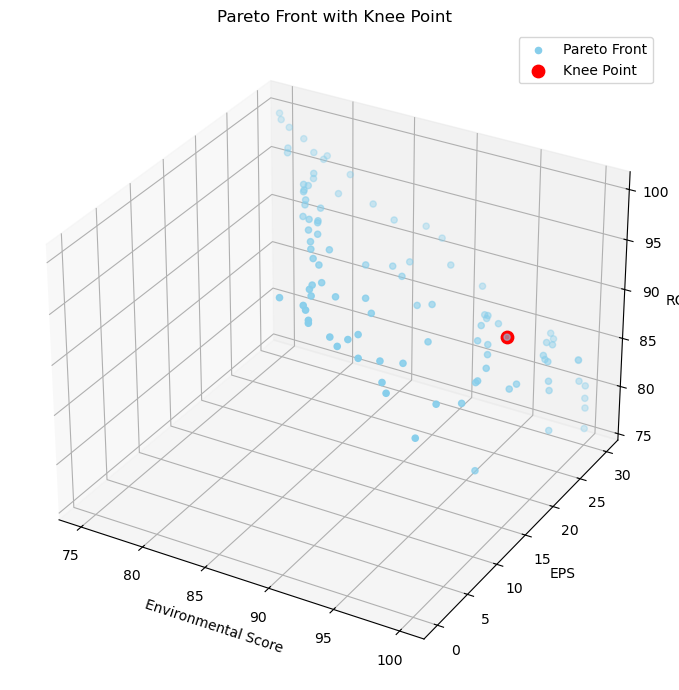

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Pick 3 objectives to visualize: ESG Environment, EPS, ROE
# (these correspond to columns 0, 4, 5 in pareto_objectives)
x = pareto_objectives[:, 0]  # Environmental Score
y = pareto_objectives[:, 4]  # EPS
z = pareto_objectives[:, 5]  # ROE

# Knee point coordinates
knee_x = pareto_objectives[knee_index, 0]
knee_y = pareto_objectives[knee_index, 4]
knee_z = pareto_objectives[knee_index, 5]

# Create 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot all Pareto solutions
ax.scatter(x, y, z, c='skyblue', label='Pareto Front')

# Highlight knee point
ax.scatter(knee_x, knee_y, knee_z, c='red', s=80, label='Knee Point')

# Labels and title
ax.set_xlabel("Environmental Score")
ax.set_ylabel("EPS")
ax.set_zlabel("ROE")
ax.set_title("Pareto Front with Knee Point")
ax.legend()

plt.tight_layout()
plt.show()


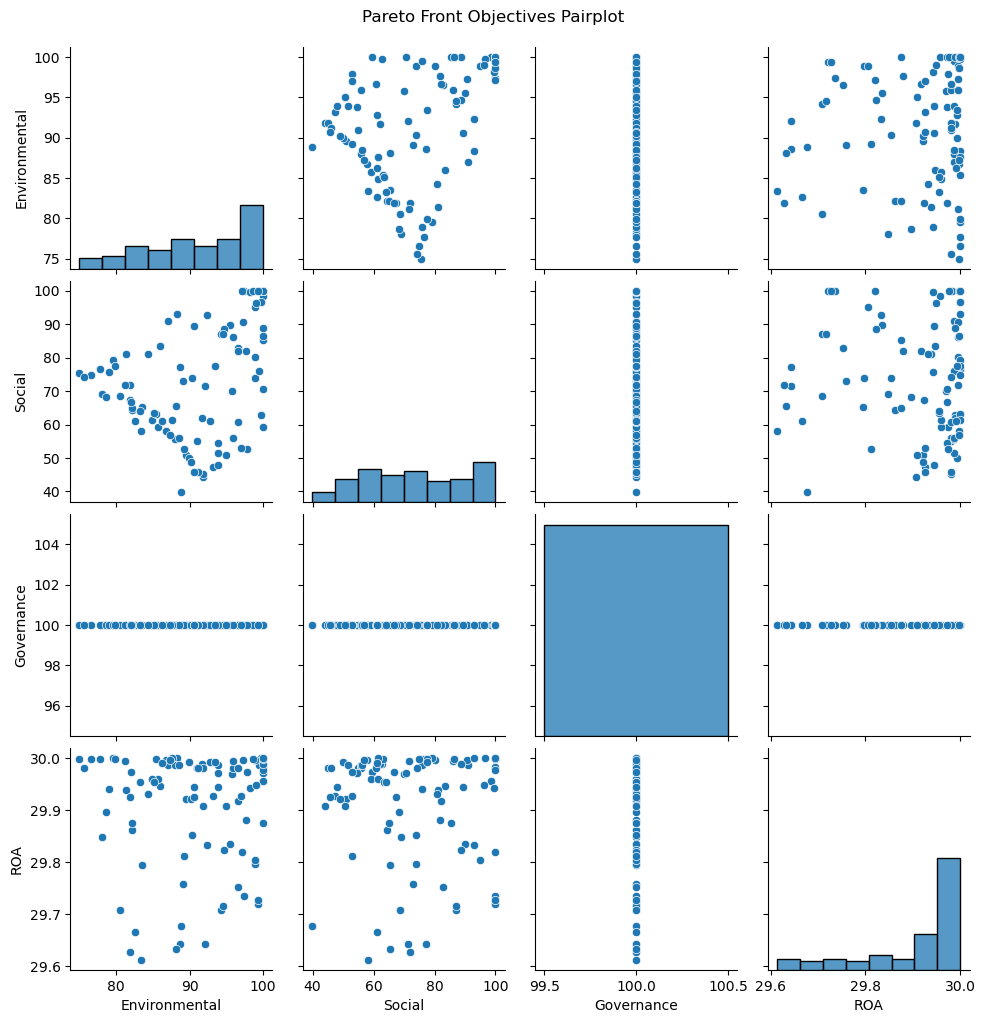

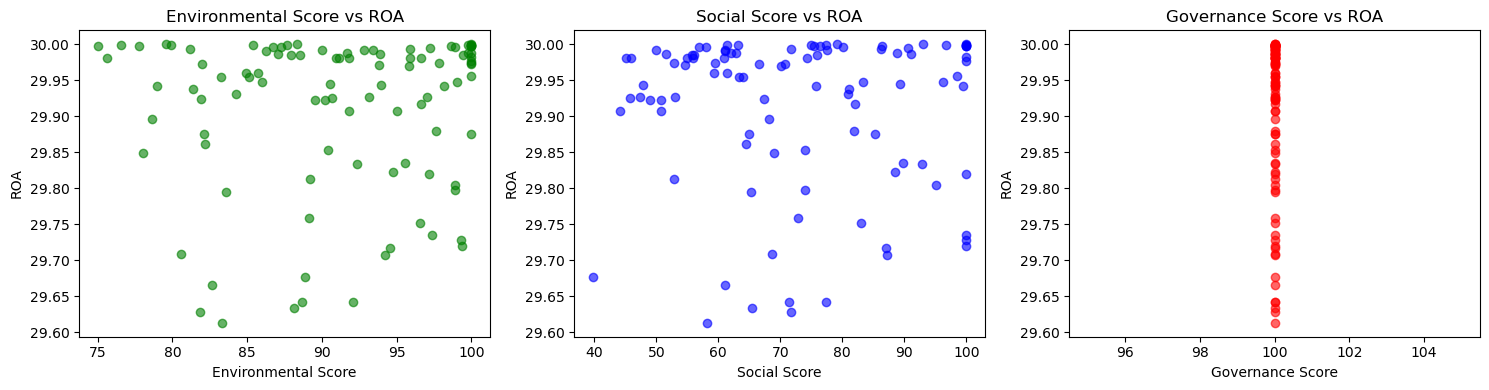

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you already have these from your optimization results:
# res.F : objectives (negated, so convert back)
# res.X : decision variables

# Revert negation for objectives
pareto_objectives = -res.F

# Create a DataFrame for easier plotting
import pandas as pd
df = pd.DataFrame({
    'Environmental': pareto_objectives[:, 0],
    'Social': pareto_objectives[:, 1],
    'Governance': pareto_objectives[:, 2],
    'ROA': pareto_objectives[:, 3]
})

# Pairplot to show all pairwise relationships
sns.pairplot(df)
plt.suptitle("Pareto Front Objectives Pairplot", y=1.02)
plt.show()

# Additionally, you might want individual 2D plots:

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.scatter(df['Environmental'], df['ROA'], c='green', alpha=0.6)
plt.xlabel('Environmental Score')
plt.ylabel('ROA')
plt.title('Environmental Score vs ROA')

plt.subplot(1,3,2)
plt.scatter(df['Social'], df['ROA'], c='blue', alpha=0.6)
plt.xlabel('Social Score')
plt.ylabel('ROA')
plt.title('Social Score vs ROA')

plt.subplot(1,3,3)
plt.scatter(df['Governance'], df['ROA'], c='red', alpha=0.6)
plt.xlabel('Governance Score')
plt.ylabel('ROA')
plt.title('Governance Score vs ROA')

plt.tight_layout()
plt.show()

### With also ESG_score and ESG_Comb_score

In [50]:
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
import numpy as np
import joblib

# Load GAM models
gam_environment = joblib.load("saved_gam_models/gam_model_Env_score.pkl")
gam_social = joblib.load("saved_gam_models/gam_model_Soc_score.pkl")
gam_governance = joblib.load("saved_gam_models/gam_model_Gov_score.pkl")
gam_esg_score = joblib.load("saved_gam_models/gam_model_ESG_score.pkl")
gam_esg_comb_score = joblib.load("saved_gam_models/gam_model_ESG_Comb_score.pkl")

class ESGMultiObjectiveProblem(Problem):
    def __init__(self):
        super().__init__(
            n_var=3,
            n_obj=8,  # Now optimizing 8 objectives
            n_constr=10,
            xl=np.array([0, 0, 0]),     # EPS, ROA, ROE lower bounds
            xu=np.array([30, 30, 100])  # EPS, ROA, ROE upper bounds
        )

    def _evaluate(self, X, out, *args, **kwargs):
        country_code = 0
        industry_code = 0
        mcap_code = 0

        # Add categorical variables for GAM input
        X_full = np.hstack([
            X,
            np.full((X.shape[0], 1), country_code),
            np.full((X.shape[0], 1), industry_code),
            np.full((X.shape[0], 1), mcap_code)
        ])

        # Predict ESG scores
        esg_env = np.clip(gam_environment.predict(X_full), 0, 100)
        esg_soc = np.clip(gam_social.predict(X_full), 0, 100)
        esg_gov = np.clip(gam_governance.predict(X_full), 0, 100)
        esg_score = np.clip(gam_esg_score.predict(X_full), 0, 100)
        esg_comb_score = np.clip(gam_esg_comb_score.predict(X_full), 0, 100)

        # Extract financial KPIs
        eps = X[:, 0]
        roa = X[:, 1]
        roe = X[:, 2]

        # Objective: maximize all → minimize negative values
        out["F"] = np.column_stack([
            -esg_env,
            -esg_soc,
            -esg_gov,
            -esg_score,
            -esg_comb_score,
            -roa,
            -eps,
            -roe
        ])

        # Constraints: ESG Env/Soc/Gov scores must remain in [0, 100]
        out["G"] = np.column_stack([
            esg_env - 100,
            0 - esg_env,
            esg_soc - 100,
            0 - esg_soc,
            esg_gov - 100,
            0 - esg_gov,
            esg_score - 100,
            0 - esg_score,
            esg_comb_score - 100,
            0 - esg_comb_score
        ])

        # Optional debug info
        print(f"ESG Env min={esg_env.min():.2f}, max={esg_env.max():.2f}")
        print(f"ESG Soc min={esg_soc.min():.2f}, max={esg_soc.max():.2f}")
        print(f"ESG Gov min={esg_gov.min():.2f}, max={esg_gov.max():.2f}")
        print(f"ESG Score min={esg_score.min():.2f}, max={esg_score.max():.2f}")
        print(f"ESG Comb Score min={esg_comb_score.min():.2f}, max={esg_comb_score.max():.2f}")

# Optimization setup
problem = ESGMultiObjectiveProblem()

algorithm = NSGA2(
    pop_size=100,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)

res = minimize(
    problem,
    algorithm=algorithm,
    termination=('n_gen', 200),
    seed=1,
    verbose=True
)

# Output results
if res.F is None or len(res.F) == 0:
    print("⚠️ Optimization failed: No feasible solutions found.")
else:
    pareto_solutions = res.X
    pareto_objectives = -res.F  # revert negation

    for i in range(min(10, len(pareto_solutions))):
        print(f"\nSolution {i+1}:")
        print(f"EPS: {pareto_solutions[i, 0]:.2f}, ROA: {pareto_solutions[i, 1]:.2f}, ROE: {pareto_solutions[i, 2]:.2f}")
        print(f"Environmental Score:   {pareto_objectives[i, 0]:.2f}")
        print(f"Social Score:          {pareto_objectives[i, 1]:.2f}")
        print(f"Governance Score:      {pareto_objectives[i, 2]:.2f}")
        print(f"ESG Score:             {pareto_objectives[i, 3]:.2f}")
        print(f"ESG Combined Score:    {pareto_objectives[i, 4]:.2f}")
        print(f"ROA:                   {pareto_objectives[i, 5]:.2f}")
        print(f"EPS:                   {pareto_objectives[i, 6]:.2f}")
        print(f"ROE:                   {pareto_objectives[i, 7]:.2f}")


ESG Env min=0.00, max=100.00
ESG Soc min=0.00, max=100.00
ESG Gov min=100.00, max=100.00
ESG Score min=30.00, max=100.00
ESG Comb Score min=40.48, max=100.00
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |     27 |  0.000000E+00 |  0.000000E+00 |             - |             -
ESG Env min=0.00, max=100.00
ESG Soc min=0.00, max=100.00
ESG Gov min=100.00, max=100.00
ESG Score min=29.57, max=100.00
ESG Comb Score min=37.65, max=100.00
     2 |      200 |     37 |  0.000000E+00 |  0.000000E+00 |  0.0189190833 |         ideal
ESG Env min=0.00, max=100.00
ESG Soc min=0.00, max=100.00
ESG Gov min=100.00, max=100.00
ESG Score min=29.92, max=100.00
ESG Comb Score min=37.10, max=100.00
     3 |      300 |     40 |  0.000000E+00 |  0.000000E+00 |  0.0037437468 |         ideal
ESG Env min=0.00, max=100.00
ESG Soc min=0.00, max=100.00
ESG Gov min=100.00, max=100.00
ESG Score min=26.44, max=100.00
ESG Comb Score min=37.65, max=100.00
    

In [76]:
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
import numpy as np
import joblib

# Load GAM models
gam_environment = joblib.load("saved_gam_models/gam_model_Env_score.pkl")
gam_social = joblib.load("saved_gam_models/gam_model_Soc_score.pkl")
gam_governance = joblib.load("saved_gam_models/gam_model_Gov_score.pkl")
gam_esg_score = joblib.load("saved_gam_models/gam_model_ESG_score.pkl")
gam_esg_comb_score = joblib.load("saved_gam_models/gam_model_ESG_Comb_score.pkl")

class ESGMultiObjectiveProblem(Problem):
    def __init__(self):
        super().__init__(
            n_var=3,
            n_obj=8,  # Now optimizing 8 objectives
            n_constr=10,
            # xl=np.array([-10, -10, -20]),   # EPS, ROA, ROE lower realistic bounds
            # xu=np.array([100, 50, 50])     # EPS, ROA, ROE upper realistic bounds
            xl=np.array([-731.89, -15.1, -221.8]),   # EPS, ROA, ROE lower realistic bounds
            xu=np.array([780.29, 53.4, 529.3])     # EPS, ROA, ROE upper realistic bounds

        )

    def _evaluate(self, X, out, *args, **kwargs):
        country_code = 0
        industry_code = 0
        mcap_code = 0

        # Add categorical variables for GAM input
        X_full = np.hstack([
            X,
            np.full((X.shape[0], 1), country_code),
            np.full((X.shape[0], 1), industry_code),
            np.full((X.shape[0], 1), mcap_code)
        ])

        # Predict ESG scores
        esg_env = np.clip(gam_environment.predict(X_full), 0, 100)
        esg_soc = np.clip(gam_social.predict(X_full), 0, 100)
        esg_gov = np.clip(gam_governance.predict(X_full), 0, 100)
        esg_score = np.clip(gam_esg_score.predict(X_full), 0, 100)
        esg_comb_score = np.clip(gam_esg_comb_score.predict(X_full), 0, 100)

        # Extract financial KPIs
        eps = X[:, 0]
        roa = X[:, 1]
        roe = X[:, 2]

        # Objective: maximize all → minimize negative values
        out["F"] = np.column_stack([
            -esg_env,
            -esg_soc,
            -esg_gov,
            -esg_score,
            -esg_comb_score,
            -roa,
            -eps,
            -roe
        ])

        # Constraints: ESG Env/Soc/Gov scores must remain in [0, 100]
        out["G"] = np.column_stack([
            esg_env - 100,
            0 - esg_env,
            esg_soc - 100,
            0 - esg_soc,
            esg_gov - 100,
            0 - esg_gov,
            esg_score - 100,
            0 - esg_score,
            esg_comb_score - 100,
            0 - esg_comb_score
        ])

        # # Optional debug info
        # print(f"ESG Env min={esg_env.min():.2f}, max={esg_env.max():.2f}")
        # print(f"ESG Soc min={esg_soc.min():.2f}, max={esg_soc.max():.2f}")
        # print(f"ESG Gov min={esg_gov.min():.2f}, max={esg_gov.max():.2f}")
        # print(f"ESG Score min={esg_score.min():.2f}, max={esg_score.max():.2f}")
        # print(f"ESG Comb Score min={esg_comb_score.min():.2f}, max={esg_comb_score.max():.2f}")

# Optimization setup
problem = ESGMultiObjectiveProblem()

algorithm = NSGA2(
    pop_size=100,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)

res = minimize(
    problem,
    algorithm=algorithm,
    termination=('n_gen', 200),
    seed=1,
    verbose=True
)

# Output results
if res.F is None or len(res.F) == 0:
    print("⚠️ Optimization failed: No feasible solutions found.")
else:
    pareto_solutions = res.X
    pareto_objectives = -res.F  # revert negation

    for i in range(min(10, len(pareto_solutions))):
        print(f"\nSolution {i+1}:")
        print(f"EPS: {pareto_solutions[i, 0]:.2f}, ROA: {pareto_solutions[i, 1]:.2f}, ROE: {pareto_solutions[i, 2]:.2f}")
        print(f"Environmental Score:   {pareto_objectives[i, 0]:.2f}")
        print(f"Social Score:          {pareto_objectives[i, 1]:.2f}")
        print(f"Governance Score:      {pareto_objectives[i, 2]:.2f}")
        print(f"ESG Score:             {pareto_objectives[i, 3]:.2f}")
        print(f"ESG Combined Score:    {pareto_objectives[i, 4]:.2f}")
        print(f"ROA:                   {pareto_objectives[i, 5]:.2f}")
        print(f"EPS:                   {pareto_objectives[i, 6]:.2f}")
        print(f"ROE:                   {pareto_objectives[i, 7]:.2f}")


n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |     35 |  0.000000E+00 |  0.000000E+00 |             - |             -
     2 |      200 |     33 |  0.000000E+00 |  0.000000E+00 |  0.0191613136 |         ideal
     3 |      300 |     53 |  0.000000E+00 |  0.000000E+00 |  0.0050798974 |         ideal
     4 |      400 |     63 |  0.000000E+00 |  0.000000E+00 |  0.0032623339 |         ideal
     5 |      500 |     63 |  0.000000E+00 |  0.000000E+00 |  0.0059400111 |         ideal
     6 |      600 |     73 |  0.000000E+00 |  0.000000E+00 |  0.0563729549 |             f
     7 |      700 |     91 |  0.000000E+00 |  0.000000E+00 |  0.1382842125 |         nadir
     8 |      800 |     93 |  0.000000E+00 |  0.000000E+00 |  0.0329433794 |             f
     9 |      900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0471491529 |             f
    10 |     1000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0375857378 |             f

In [78]:
print(f"Number of Pareto-optimal solutions: {len(pareto_solutions)}")

Number of Pareto-optimal solutions: 100


In [80]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalize objectives (to handle different scales)
scaler = MinMaxScaler()
normalized_obj = scaler.fit_transform(pareto_objectives)

# Ideal point (max for each objective, since maximizing)
ideal = np.max(normalized_obj, axis=0)

# Calculate Euclidean distances to the ideal point
distances = np.linalg.norm(normalized_obj - ideal, axis=1)

# Knee point is the solution closest to the ideal point
knee_index = np.argmin(distances)
knee_solution = pareto_solutions[knee_index]
knee_objectives = pareto_objectives[knee_index]

# Print results with the correct order
print("\n🏆 Knee Point Solution (Best Trade-off):")
# print(f"EPS:               {knee_solution[0]:.2f}")
# print(f"ROA:               {knee_solution[1]:.2f}")
# print(f"ROE:               {knee_solution[2]:.2f}")
print(f"Environmental Score: {knee_objectives[0]:.2f}")
print(f"Social Score:        {knee_objectives[1]:.2f}")
print(f"Governance Score:    {knee_objectives[2]:.2f}")
print(f"ESG Score:           {knee_objectives[3]:.2f}")
print(f"ESG Combined Score:   {knee_objectives[4]:.2f}")
print(f"ROA:                 {knee_objectives[5]:.2f}")
print(f"EPS:                 {knee_objectives[6]:.2f}")
print(f"ROE:                 {knee_objectives[7]:.2f}")




🏆 Knee Point Solution (Best Trade-off):
Environmental Score: 79.74
Social Score:        95.52
Governance Score:    100.00
ESG Score:           100.00
ESG Combined Score:   100.00
ROA:                 52.63
EPS:                 11.50
ROE:                 437.84


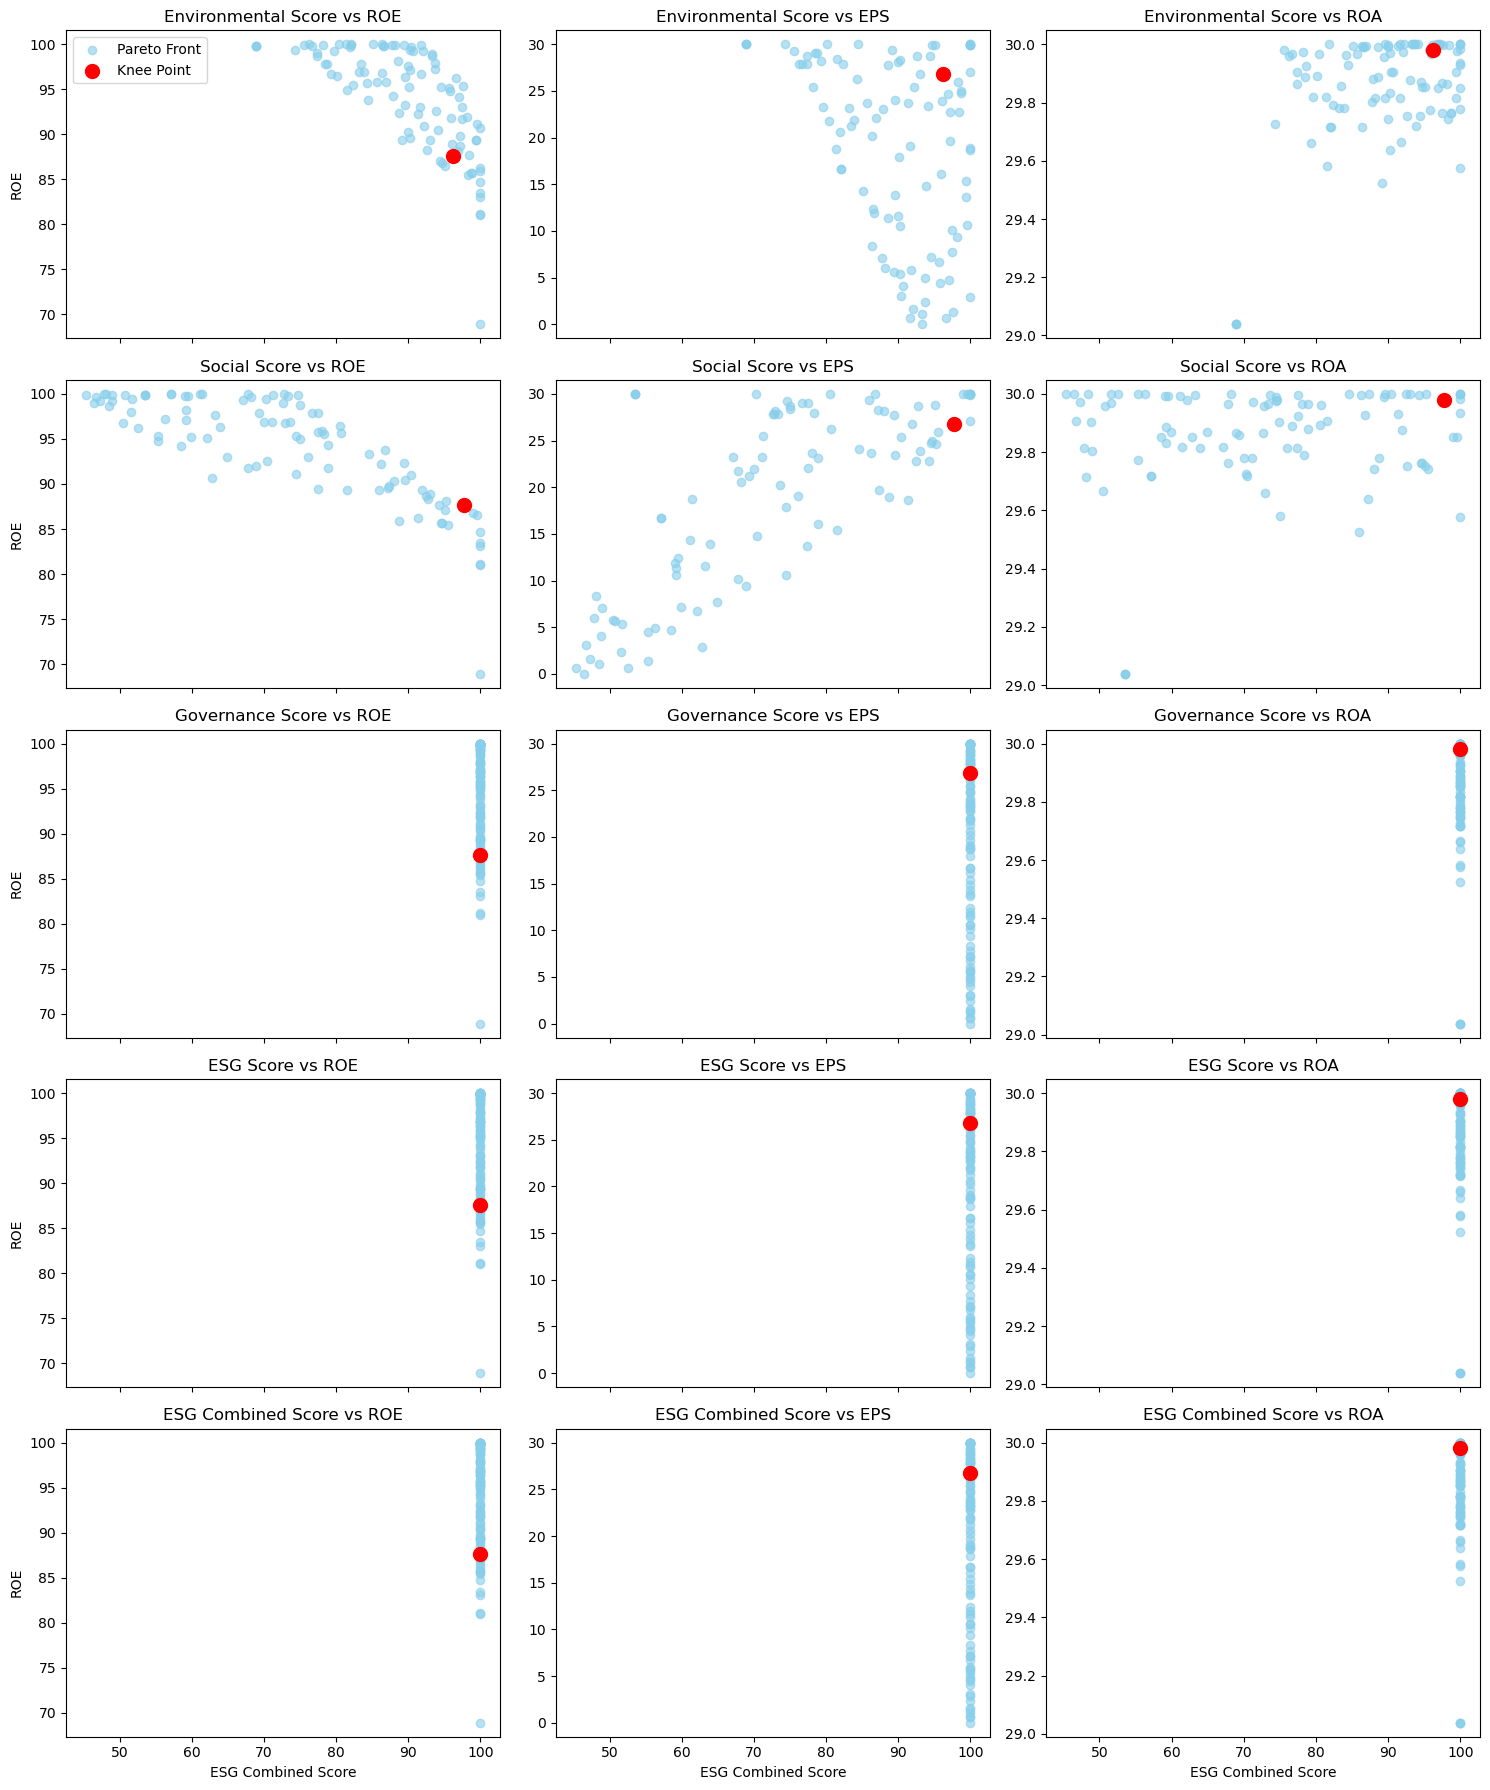

In [46]:
import matplotlib.pyplot as plt

# Extract variables from pareto_objectives
env = pareto_objectives[:, 0]      # Environmental Score
soc = pareto_objectives[:, 1]      # Social Score
gov = pareto_objectives[:, 2]      # Governance Score
esg_score = pareto_objectives[:, 3]    # ESG Score
esg_comb = pareto_objectives[:, 4]     # ESG Combined Score

eps = pareto_objectives[:, 6]      # EPS
roe = pareto_objectives[:, 7]      # ROE
roa = pareto_objectives[:, 5]      # ROA

# Knee point index (assumed available)
knee_point = knee_index

# Dictionary of ESG variables
esg_vars = {
    'Environmental Score': env,
    'Social Score': soc,
    'Governance Score': gov,
    'ESG Score': esg_score,
    'ESG Combined Score': esg_comb
}

# Dictionary of financial variables
financial_vars = {
    'ROE': roe,
    'EPS': eps,
    'ROA': roa
}

# Create subplots grid: rows = ESG vars, cols = financial vars
fig, axes = plt.subplots(len(esg_vars), len(financial_vars), figsize=(15, 18), sharex='col')

for i, (esg_name, esg_values) in enumerate(esg_vars.items()):
    for j, (fin_name, fin_values) in enumerate(financial_vars.items()):
        ax = axes[i, j]
        
        # Scatter plot of Pareto front solutions
        ax.scatter(esg_values, fin_values, alpha=0.6, color='skyblue', label='Pareto Front')
        
        # Highlight the knee point
        ax.scatter(esg_values[knee_point], fin_values[knee_point], color='red', s=100, label='Knee Point')
        
        if i == len(esg_vars) - 1:
            ax.set_xlabel(esg_name)
        if j == 0:
            ax.set_ylabel(fin_name)
        
        ax.set_title(f"{esg_name} vs {fin_name}")
        
        if i == 0 and j == 0:
            ax.legend(loc='upper left')

plt.tight_layout()
plt.show()


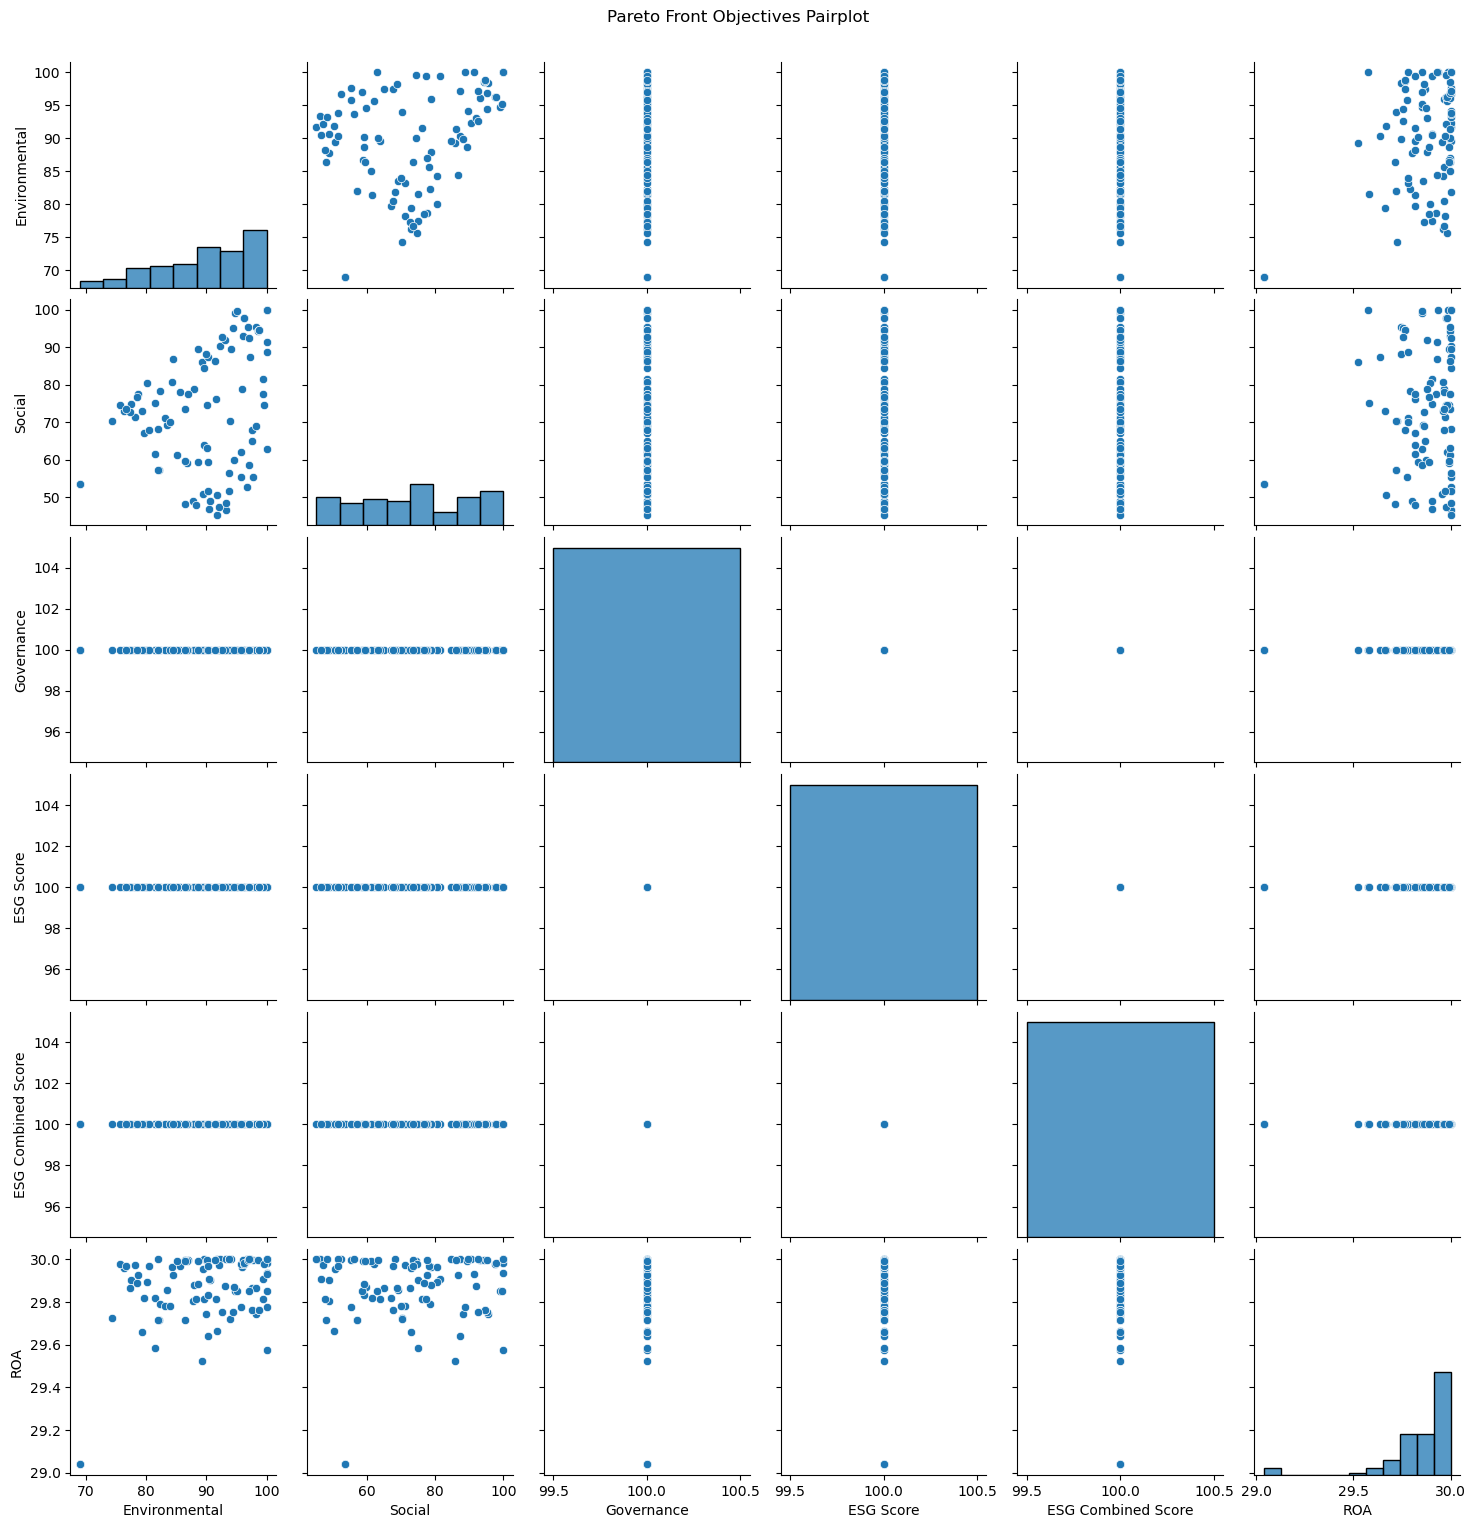

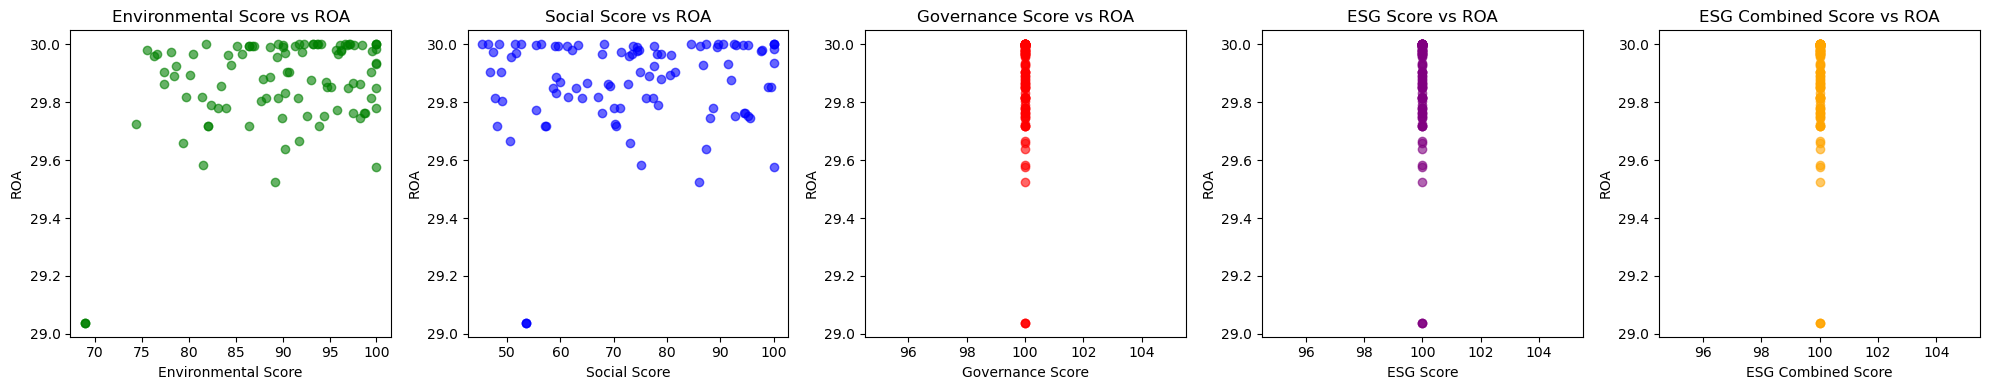

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Revert negation for objectives
pareto_objectives = -res.F

# Create DataFrame including ESG Score and ESG Combined Score
df = pd.DataFrame({
    'Environmental': pareto_objectives[:, 0],
    'Social': pareto_objectives[:, 1],
    'Governance': pareto_objectives[:, 2],
    'ESG Score': pareto_objectives[:, 3],
    'ESG Combined Score': pareto_objectives[:, 4],
    'ROA': pareto_objectives[:, 5]
})

# Pairplot to show all pairwise relationships including ESG scores
sns.pairplot(df)
plt.suptitle("Pareto Front Objectives Pairplot", y=1.02)
plt.show()

# Individual 2D scatter plots vs ROA

plt.figure(figsize=(20, 4))

plt.subplot(1, 5, 1)
plt.scatter(df['Environmental'], df['ROA'], c='green', alpha=0.6)
plt.xlabel('Environmental Score')
plt.ylabel('ROA')
plt.title('Environmental Score vs ROA')

plt.subplot(1, 5, 2)
plt.scatter(df['Social'], df['ROA'], c='blue', alpha=0.6)
plt.xlabel('Social Score')
plt.ylabel('ROA')
plt.title('Social Score vs ROA')

plt.subplot(1, 5, 3)
plt.scatter(df['Governance'], df['ROA'], c='red', alpha=0.6)
plt.xlabel('Governance Score')
plt.ylabel('ROA')
plt.title('Governance Score vs ROA')

plt.subplot(1, 5, 4)
plt.scatter(df['ESG Score'], df['ROA'], c='purple', alpha=0.6)
plt.xlabel('ESG Score')
plt.ylabel('ROA')
plt.title('ESG Score vs ROA')

plt.subplot(1, 5, 5)
plt.scatter(df['ESG Combined Score'], df['ROA'], c='orange', alpha=0.6)
plt.xlabel('ESG Combined Score')
plt.ylabel('ROA')
plt.title('ESG Combined Score vs ROA')

plt.tight_layout()
plt.show()
